# Credit Card Fraud Detection

## Table of Contents
1. Library Management
2. Data Sourcing
3. Data Cleaning
4. Univariate / Bivariate Analysis
5. Data Preprocesing for Modelling
6. Logistic Regression
7. Random Forest
8. XG-Boost
9. Final Evaluation Metrics

# 1. Library Management

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
sns.set(rc={'figure.figsize':(15,8)})

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import RFE
# from sklearn.metrics import r2_score

# 2. Data Sourcing

In [6]:
input_file_path = '../data/creditcard.csv'

In [7]:
raw_data = pd.read_csv(input_file_path)

In [8]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 3. Data Cleaning

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### From the above information, we can say that, there is no need for data cleansing as there are no null / empty / missing values.

#### Furthermore, we can proceed ahead towards variable analysis

# 4. Univariate / Bivariate Analysis

## 4.1. Pre-Defined Fucntions for Univariate / Bivariate analysis

In [187]:
def plot_bar_graph_from_series(data, plot_title, x_axis_label, y_axis_label, x_axis_label_rotation=0, y_axis_label_rotation=0, data_label_rotation='vertical'):
    graph = sns.barplot(x=data.index, y=data.values)
    plt.title(plot_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label, fontdict={'fontsize': 15})
    plt.ylabel(y_axis_label, fontdict={'fontsize': 15})
    graph.set_xticklabels(graph.get_xticklabels(), rotation=x_axis_label_rotation)
    graph.set_yticklabels(graph.get_yticklabels(), rotation=y_axis_label_rotation)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label_rotation)
    plt.show()

In [188]:
# plot_bar_graph_from_series(
#     data=raw_data.Class,
#     plot_title="Class Distribution", 
#     x_axis_label="Class",
#     y_axis_label="Count",
# )

## 4.2. Class

#### While looking at the data, we see that Class column corresponds to Credit Card Fraud value. Therefore we will analyse this column first

#### Data Interpretation
1. Class 0 ==> No Fraud
2. Class 1 ==> Fraud

In [94]:
raw_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

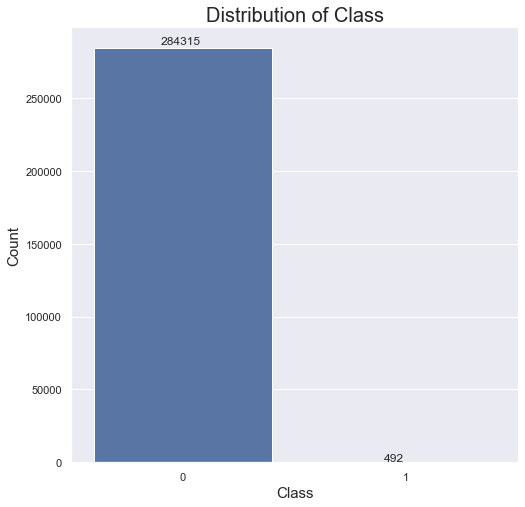

In [138]:
plt.figure(figsize=(8,8))
ax = sns.countplot(raw_data.Class)
plt.title('Distribution of Class', fontdict={'fontsize': 20})
plt.xlabel('Class', fontdict={'fontsize': 15})
plt.ylabel('Count', fontdict={'fontsize': 15})
for p, label in zip(ax.patches, raw_data.Class.value_counts().index):
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()*1.01))
plt.show()

#### We see that there is a huge data imbalance.
#### For that, we need to drop data for outlier treatment with utmost care as the orginal datset has very less number of Class 1 values

## 4.3. Time

#### Going as per the explanation of this variable, we see that every value in this row is dependent on time between current value and value in the first row of this column.

#### This way, it makes this varaible not an independent identified variable and hence should not be consdiered for analysis.

#### Thereby, we can drop this variable

In [17]:
raw_data = raw_data.drop(columns=['Time'])

In [18]:
raw_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### We see that there is a huge data imbalance.
#### For that, we need to drop data with utmost care as the orginal datset has very less number of Class 1 values

## 4.4. Amount

In [144]:
raw_data.Amount.describe(percentiles=np.linspace(0, 1, 11))

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
0%            0.000000
10%           1.000000
20%           3.570000
30%           8.910000
40%          13.000000
50%          22.000000
60%          37.000000
70%          59.800000
80%         100.000000
90%         203.000000
100%      25691.160000
max       25691.160000
Name: Amount, dtype: float64

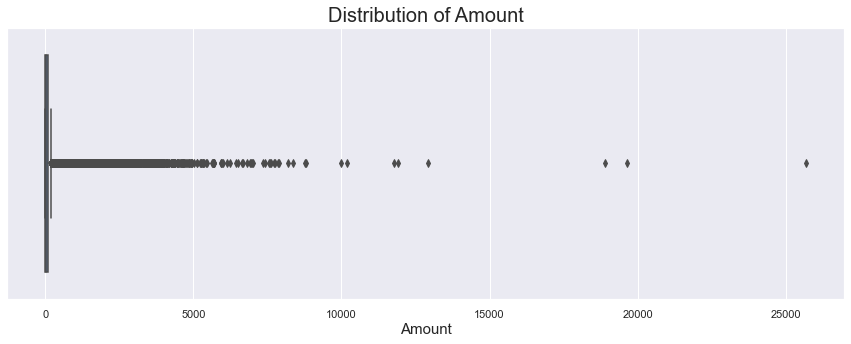

In [145]:
plt.figure(figsize=(15,5))
sns.boxplot(raw_data.Amount)
plt.title('Distribution of Amount', fontdict={'fontsize': 20})
plt.xlabel('Amount', fontdict={'fontsize': 15})
plt.show()

#### We see that there is a huge skewness in the amount column. Lets try to map this column with respect to class variable

#### Let's distribute the amount column in 10 different groups (i.e. from 0 to 10%, 10% to 20% etc)
#### After this, we can visualise if there is any pattern observed between Credit Card Fraud and Amount

In [155]:
def amount_binning(x, max_amount):
    if x <= (0.1*max_amount):
        return 'Upto 10%'
    elif x <= (0.2*max_amount):
        return '10% to 20%'
    elif x <= (0.3*max_amount):
        return '20% to 30%'
    elif x <= (0.4*max_amount):
        return '30% to 40%'
    elif x <= (0.5*max_amount):
        return '40% to 50%'
    elif x <= (0.6*max_amount):
        return '50% to 60%'
    elif x <= (0.7*max_amount):
        return '60% to 70%'
    elif x <= (0.8*max_amount):
        return '70% to 80%'
    elif x <= (0.9*max_amount):
        return '80% to 90%'
    else:
        return 'More Than 90%'

In [171]:
raw_data['Amount_Bin'] = raw_data.Amount.apply(amount_binning, args=(max(raw_data.Amount),))

In [175]:
raw_data.groupby(['Amount_Bin', 'Class']).Class.count()

Amount_Bin     Class
10% to 20%     0           360
20% to 30%     0            36
30% to 40%     0            10
40% to 50%     0             2
50% to 60%     0             1
70% to 80%     0             2
More Than 90%  0             1
Upto 10%       0        283903
               1           492
Name: Class, dtype: int64

#### Here, it is observed that all the Credit Cards Fraud that has happened are usually for smaller value. i.e. Less than 2500
#### Said that, we see a strong connectivity between Amount and Credit Card Fraud.
#### As the amount goes on increasing there is almost no chance for Credit Card Fraud

##### Thereby, we will drop the newly created column of Amount_Bin

In [186]:
raw_data = raw_data.drop(columns=['Amount_Bin'])

## 4.5. V1

In [42]:
raw_data.V1.describe(percentiles=np.linspace(0, 1, 11))

count    2.848070e+05
mean     1.168375e-15
std      1.958696e+00
min     -5.640751e+01
0%      -5.640751e+01
10%     -1.893272e+00
20%     -1.134663e+00
30%     -7.472943e-01
40%     -4.267559e-01
50%      1.810880e-02
60%      1.035107e+00
70%      1.224825e+00
80%      1.694936e+00
90%      2.015409e+00
100%     2.454930e+00
max      2.454930e+00
Name: V1, dtype: float64

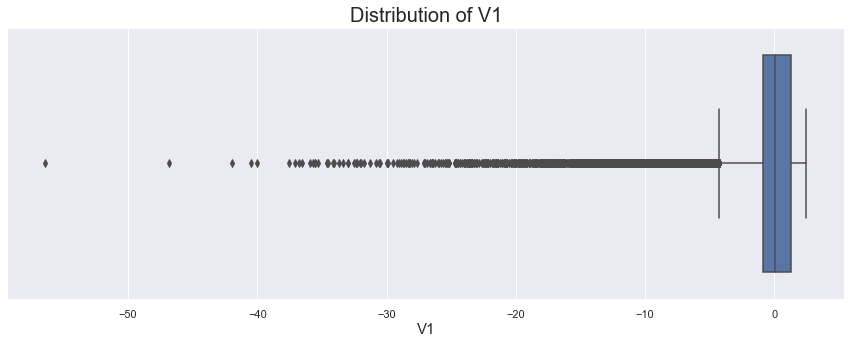

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(raw_data.V1)
plt.title('Distribution of V1', fontdict={'fontsize': 20})
plt.xlabel('V1', fontdict={'fontsize': 15})
plt.show()

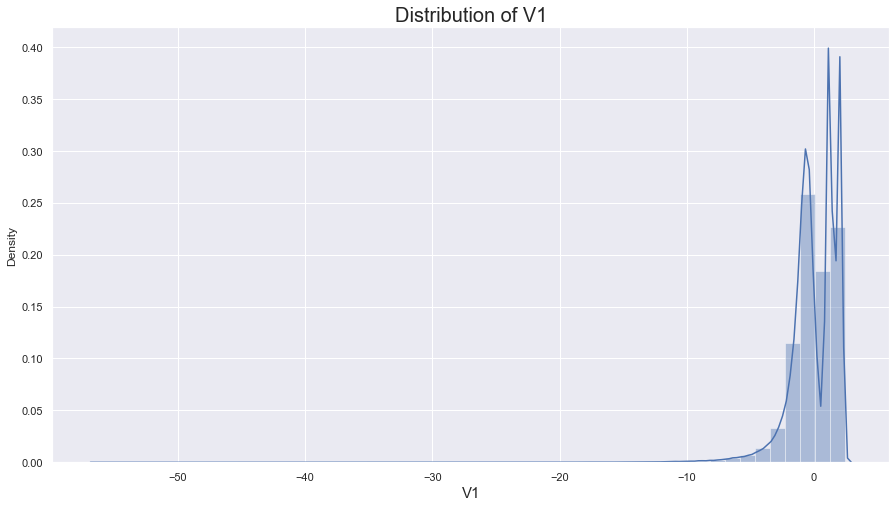

In [47]:
sns.distplot(raw_data.V1)
plt.title('Distribution of V1', fontdict={'fontsize': 20})
plt.xlabel('V1', fontdict={'fontsize': 15})
plt.show()

#### In the above graph, we see that the graph is highly skewed towards left side (i.e. Negative Skewed)
#### In such cases, we can afford dropping off certain outliers which will be impacting.

#### In normal outlier detection process, we can afford to drop these rows.
#### But since we have an imbalanced data set, we need to see if these outlier removal process is impacting class imabalance more? 

In [75]:
raw_value_count = raw_data.Class.value_counts()
raw_value_count

0    284315
1       492
Name: Class, dtype: int64

In [76]:
extrinsic_value_count = raw_data[raw_data.V1 > raw_data.V1.quantile(0.01)].Class.value_counts()
extrinsic_value_count

0    281582
1       376
Name: Class, dtype: int64

#### Let's calculate the number of minority class instances that would have been reduced

In [93]:
drop_in_values = (raw_value_count[1] - extrinsic_value_count[1])/raw_value_count[1] * 100
print(round(drop_in_values, 2))

23.58


#### Here, we see that number of minority will go down by 24% if we treat outliers and drop them.
#### But, since minority class values are so low, we cannot afford to drop these value.
#### Thus we, will continue to keep these outliers

## Exploratory data analysis

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

In [ ]:
#observe the different feature type present in the data



Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations



In [ ]:
# Create a scatter plot to observe the distribution of classes with time


In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount

In [ ]:
# Drop unnecessary columns

### Splitting the data into train & test data

In [ ]:
y= #class variable

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = 

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

### Plotting the distribution of a variable

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 

## Model Building
- Build different models on the imbalanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [ ]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
clf = ___  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)